In [1]:
#import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
#récupération du fichier
PATH_DATA = "../data/Wines.csv"
df = pd.read_csv(PATH_DATA)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [16]:
#suppression des colonnes non nécessaires
#df.pop("Id")

In [3]:
#stats globales du dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


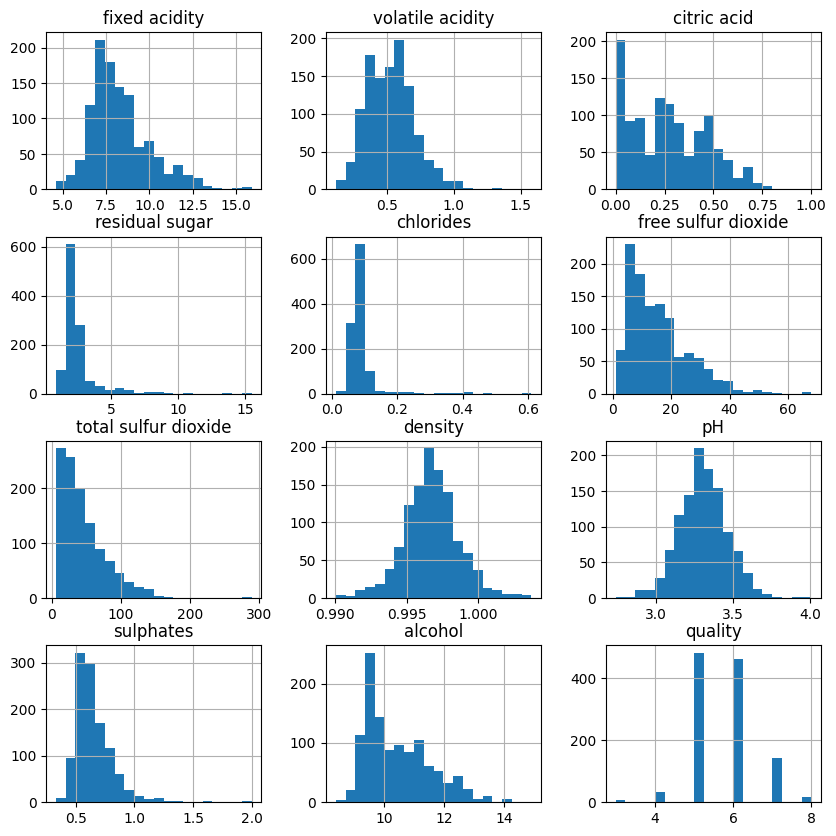

In [4]:
#Répartition du nombre de vins selon chaque variable
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [5]:
#focus sur le nombre de vins par note (qualité)
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<AxesSubplot:>

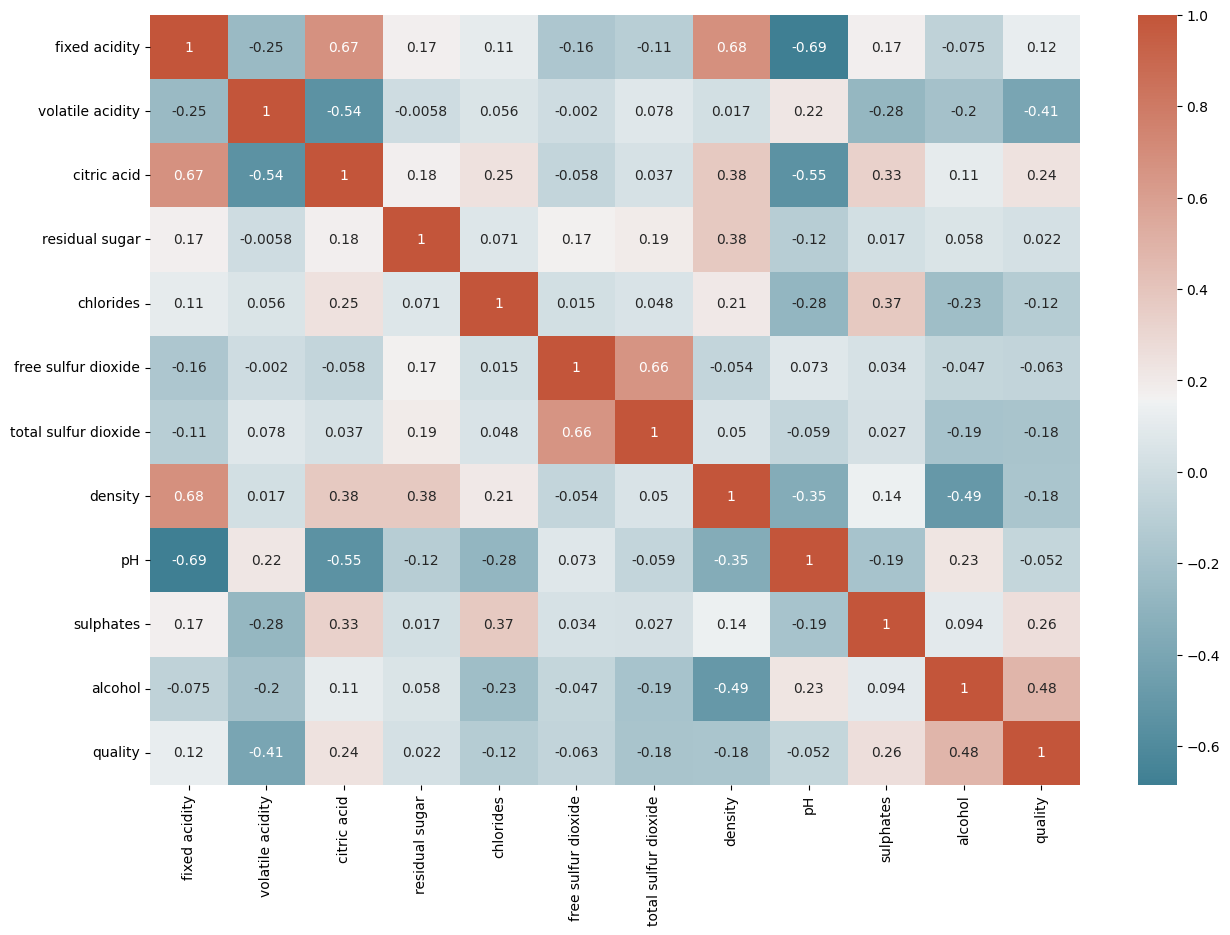

In [6]:
#corrélation inter-variables
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

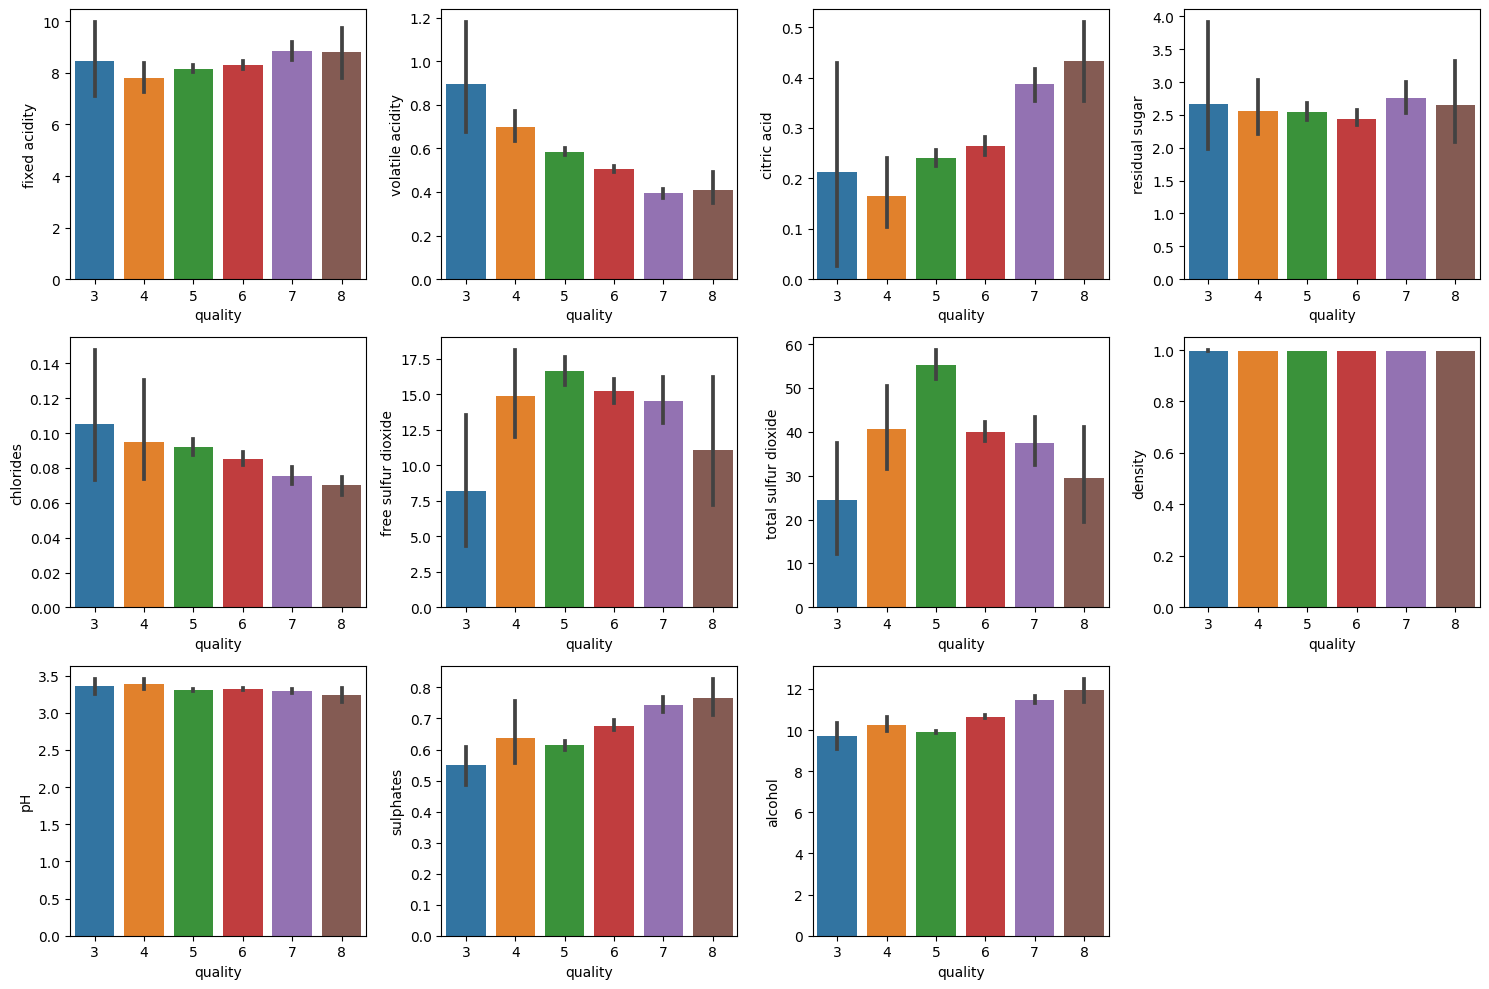

In [7]:
#graphiques de la qualité selon toutes les variables explicatives
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)
plt.tight_layout()

In [36]:
#vins parfaits
best_wines = df[df['quality'] > 7]
print(best_wines.iloc[0])


fixed acidity            7.9000
volatile acidity         0.3500
citric acid              0.4600
residual sugar           3.6000
chlorides                0.0780
free sulfur dioxide     15.0000
total sulfur dioxide    37.0000
density                  0.9973
pH                       3.3500
sulphates                0.8600
alcohol                 12.8000
quality                  8.0000
Name: 190, dtype: float64


In [8]:
#Variable cible : "quality" (en effet, c'est celle à prédire)
X = df.drop('quality', axis = 1)
y = df['quality']

In [9]:
#Séparation du dataset en base d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [10]:
#Utilisation d'un normaliseur standard pour une meilleure optimisation (basé sur la variance)
scaler = StandardScaler()

In [11]:
#Entrainement des modèles
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
#Utilisation de la librairie GridSearchCV pour sélectionner les meilleurs hyperparamètres
#on propose une liste de valeurs possible pour nos paramètres, ainsi le modèle les testera pour nous proposer la meilleure configuration
model_rf = RandomForestClassifier()
params = {
    'n_estimators': [10,25,50,100,200,500],
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth' :[10,50,200,500,750,1000]
}
grid_search_rf = GridSearchCV(model_rf, param_grid=params, scoring='accuracy', cv=10)

In [13]:
#entrainement du modèle avec toutes les valeurs de paramètres ci-dessus
grid_search_rf.fit(X_train, y_train)

C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CYTech Studen

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 50, 200, 500, 750, 1000],
                         'n_estimators': [10, 25, 50, 100, 200, 500]},
             scoring='accuracy')

In [14]:
#affichage des meilleurs paramètres possibles
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 1000, 'n_estimators': 200}

In [15]:
#On lance de nouveau notre modèle SVD en spécifiant nos meilleurs paramètres trouvés précédemment
best_model_rf = RandomForestClassifier(criterion= 'entropy', max_depth= 1000, n_estimators= 200)
best_model_rf.fit(X_train, y_train)
predict_best_rf = best_model_rf.predict(X_test)
print(classification_report(y_test, predict_best_rf))
#on passe de 85 à 90% de précision

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.75      0.77      0.76        52
           6       0.60      0.71      0.65        45
           7       0.78      0.58      0.67        12
           8       0.00      0.00      0.00         2

    accuracy                           0.69       115
   macro avg       0.36      0.34      0.35       115
weighted avg       0.66      0.69      0.67       115



C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [17]:
#Matrice de confusion (bien classés sur la diagonale)
print(confusion_matrix(y_test, predict_best_rf))

[[ 0  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0 40 12  0  0]
 [ 0  0 12 32  1  0]
 [ 0  0  0  5  7  0]
 [ 0  0  0  1  1  0]]


In [19]:
print('train R2', best_model_rf.score(X_train, y_train))
print('test R2', best_model_rf.score(X_test, y_test))

train R2 1.0
test R2 0.6869565217391305


In [20]:
#Même chose avec cette fois un autre classifieur : le SGDClassifier
model_sgd = SGDClassifier(penalty=None)
model_sgd.fit(X_train, y_train)
predict_sgd = model_sgd.predict(X_test)

In [21]:
print(classification_report(y_test, predict_sgd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.33      0.33         3
           5       0.70      0.81      0.75        52
           6       0.50      0.40      0.44        45
           7       0.19      0.25      0.21        12
           8       0.00      0.00      0.00         2

    accuracy                           0.56       115
   macro avg       0.29      0.30      0.29       115
weighted avg       0.54      0.56      0.54       115



C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [22]:
print(confusion_matrix(y_test, predict_sgd))

[[ 0  1  0  0  0  0]
 [ 0  1  1  1  0  0]
 [ 0  1 42  8  1  0]
 [ 0  0 17 18 10  0]
 [ 0  0  0  9  3  0]
 [ 0  0  0  0  2  0]]


In [23]:
#Enfin, on entraine notre modèle avec un dernier classifieur : le SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
predict_svc = model_svc.predict(X_test)

In [24]:
print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.81      0.83      0.82        52
           6       0.65      0.82      0.73        45
           7       0.80      0.33      0.47        12
           8       0.00      0.00      0.00         2

    accuracy                           0.73       115
   macro avg       0.38      0.33      0.34       115
weighted avg       0.70      0.73      0.70       115



C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [25]:
#Utilisation de la librairie GridSearchCV pour sélectionner les meilleurs hyperparamètres
#on propose une liste de valeurs possible pour nos paramètres, ainsi le modèle les testera pour nous proposer la meilleure configuration
params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_search_svc = GridSearchCV(model_svc, param_grid=params, scoring='accuracy', cv=10)

In [26]:
#entrainement du modèle avec toutes les valeurs de paramètres ci-dessus
grid_search_svc.fit(X_train, y_train)

C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [27]:
#affichage des meilleurs paramètres possibles
grid_search_svc.best_params_

{'C': 1.2, 'gamma': 1.2, 'kernel': 'rbf'}

In [28]:
#On lance de nouveau notre modèle SVD en spécifiant nos meilleurs paramètres trouvés précédemment
best_model_svc = SVC(C = 1.2, gamma =  1.2, kernel= 'rbf')
best_model_svc.fit(X_train, y_train)
predict_best_svc = best_model_svc.predict(X_test)
print(classification_report(y_test, predict_best_svc))
#on passe de 85 à 90% de précision

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.73      0.77      0.75        52
           6       0.60      0.73      0.66        45
           7       0.80      0.33      0.47        12
           8       0.00      0.00      0.00         2

    accuracy                           0.67       115
   macro avg       0.35      0.31      0.31       115
weighted avg       0.65      0.67      0.65       115



C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [29]:
#Now lets try to do some evaluation for random forest model using cross validation.
rf_eval = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10)
rf_eval.mean()

C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


0.6663240053302875

In [36]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=1)
model_xgb.fit(X_train, y_train)
y_pred5 = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred5))
print("\n")
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.56      0.34      0.43        29
           1       0.91      0.96      0.93       200

    accuracy                           0.88       229
   macro avg       0.73      0.65      0.68       229
weighted avg       0.87      0.88      0.87       229



[[ 10  19]
 [  8 192]]


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbo = GradientBoostingClassifier(random_state=1)
model_gbo.fit(X_train, y_train)
y_pred4 = model_gbo.predict(X_test)
print(classification_report(y_test, y_pred4))
print("\n")
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40        29
           1       0.91      0.94      0.93       200

    accuracy                           0.87       229
   macro avg       0.69      0.64      0.66       229
weighted avg       0.85      0.87      0.86       229



[[ 10  19]
 [ 11 189]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred6 = model_knn.predict(X_test)
print(classification_report(y_test, y_pred6))
print("\n")
print(confusion_matrix(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.45      0.31      0.37        29
           1       0.90      0.94      0.92       200

    accuracy                           0.86       229
   macro avg       0.68      0.63      0.65       229
weighted avg       0.85      0.86      0.85       229



[[  9  20]
 [ 11 189]]


C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

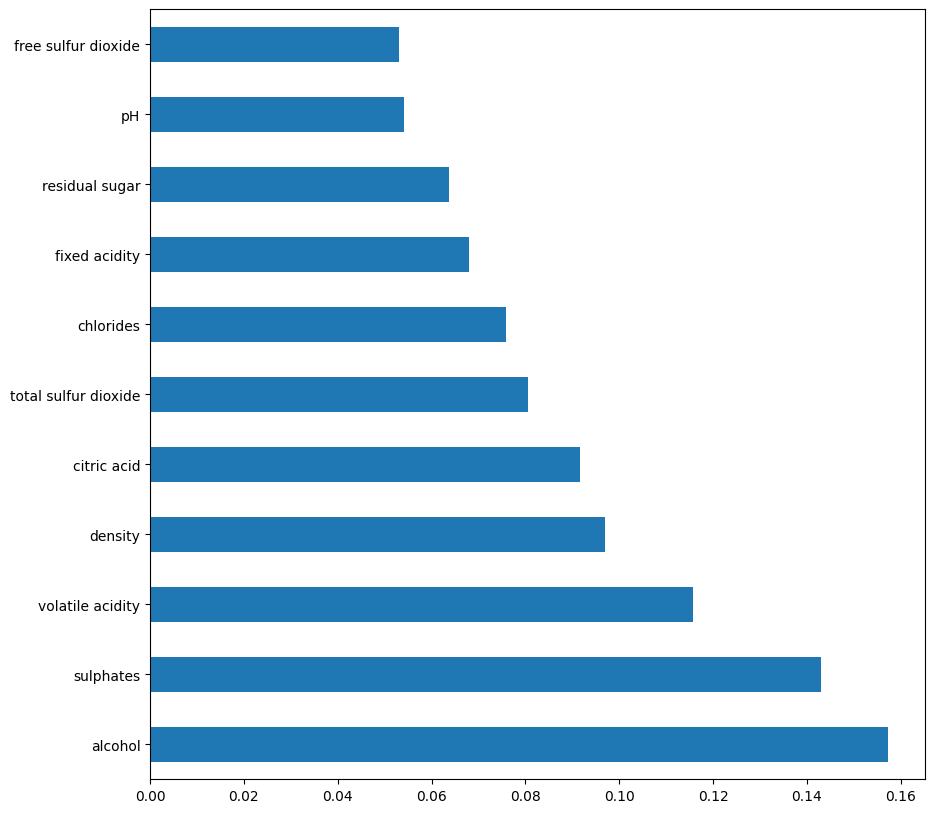

In [39]:
#feat importance pr rf
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

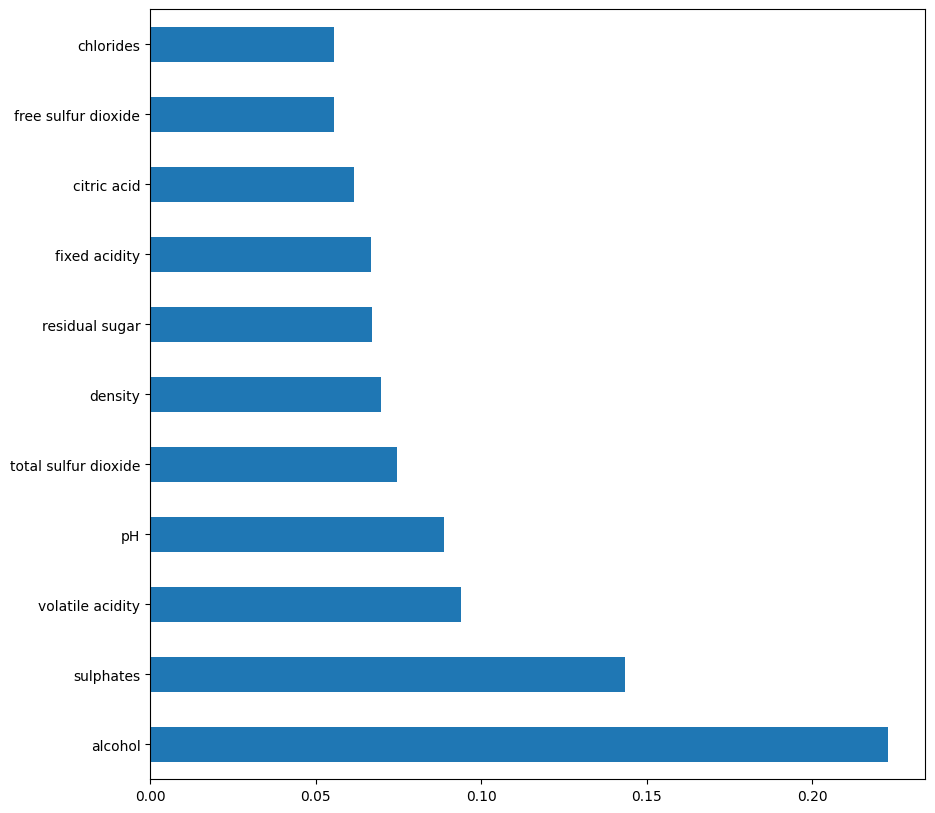

In [40]:
#pr xgb
feat_importances = pd.Series(model5.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))